In [15]:
import torch
import pandas as pd
from fastai.collab import CollabDataBunch, collab_learner

print("Imported!")

Imported!


In [7]:
ratings_df = pd.read_csv('ratings.csv')
print(ratings_df.head())

min_range = 0
max_range = max(ratings_df['rating']) + 1
print(min_range, max_range)

    uid  iid  rating
0   252    1     4.0
1   934    1     5.0
2  1195    1     4.0
3   772    1     5.0
4  1599    1     5.0
0 6.0


In [5]:
data = CollabDataBunch.from_df(ratings_df, valid_pct=0.1)
print(data.show_batch())

uid,iid,target
1131,909,5.0
1677,298,5.0
486,889,5.0
1558,306,5.0
2,688,5.0


None


In [8]:
learn = collab_learner(data, n_factors=40, y_range= [min_range, max_range], wd=.1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


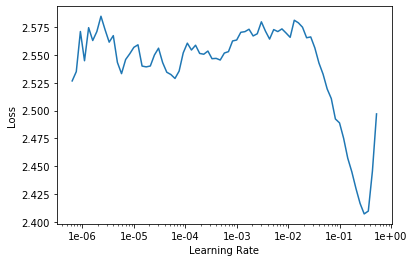

In [9]:
learn.lr_find()
learn.recorder.plot(skip_end = 15)

In [27]:
%%time
learn.fit_one_cycle(5, 0.01)

CPU times: user 12.5 s, sys: 1.16 s, total: 13.6 s
Wall time: 16.8 s


In [11]:
(users, items), ratings = next(iter(data.valid_dl))
print((users, items), ratings)

(tensor([ 534, 1274,  210, 1347,  803,  426,  168,  656,  967,  644, 1148, 1332,
         748,  307, 1541,   79,  124,  183,  291,  963, 1577, 1597, 1128,   95,
         192,  800, 1475,  425, 1287, 1239, 1513,  397,  876,  639,  843, 1471,
         284, 1228, 1631, 1515, 1507,  892, 1302, 1321, 1076,  266, 1393,  412,
        1465, 1620, 1654,  540,  200, 1586,  634, 1121, 1095, 1597,  604,  468,
        1177,  793,   23, 1131]), tensor([551, 405, 869, 906,  20, 497, 583, 381, 850, 875, 491,  83,  59, 581,
         67, 765, 508, 399, 563,  75, 477, 643, 870, 793, 505, 274, 657, 938,
        710,  93, 723, 810, 168, 932, 593, 750, 795, 795, 230, 666, 103, 589,
        126, 178, 287, 149,  67, 766, 527, 879, 260, 562, 177, 906, 577, 422,
        789, 689, 686, 324, 430, 301, 725, 950])) tensor([2., 4., 4., 1., 3., 5., 5., 3., 2., 4., 5., 2., 4., 5., 3., 4., 5., 5.,
        4., 4., 5., 3., 4., 4., 5., 5., 4., 4., 2., 4., 4., 2., 5., 5., 5., 5.,
        4., 5., 4., 3., 5., 4., 5., 5., 5.,

In [26]:
user = [534, 1274, 210]
item = [551, 405, 869]

tensor_user = torch.LongTensor(user)
tensor_item = torch.LongTensor(item)

preds = learn.model(tensor_user, tensor_item).tolist()
print(preds)

[3.965163230895996, 3.831221103668213, 4.080068588256836]
